In [1]:
import pandas as pd

In [2]:
%cd "C:\Users\veena\Documents\Assignments\machineLearning_final assignment\dataset"

C:\Users\veena\Documents\Assignments\machineLearning_final assignment\dataset


In [3]:
reviews_df =pd.read_csv('Amazon_reviews.csv',header = None, names=["Rating", "Title", "Reviews"])

In [5]:
reviews_df.head()

,Rating,Title,Reviews
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [8]:
reviews_df.shape

(3000000, 3)

In [9]:
reviews_df.Reviews.str

In [10]:
reviews_df["Polarity_of_review"] = reviews_df["Rating"].apply(lambda x: 1 if x >= 3 else 0)

In [19]:
reviews_df.head(10)

,Rating,Title,Reviews,Polarity_of_review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...,1
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,1
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,1
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,1
5,5,There's a reason for the price,"There's a reason this CD is so expensive, even...",1
6,1,Buyer beware,"This is a self-published book, and if you want...",0
7,4,"Errors, but great story",I was a dissapointed to see errors on the back...,1
8,1,The Worst!,A complete waste of time. Typographical errors...,0
9,1,Oh please,I guess you have to be a romance novel lover f...,0


In [27]:
reviews_df.groupby("Rating")['Title'].count()

Rating
1    599988
2    599977
3    599977
4    599987
5    599995
Name: Title, dtype: int64

In [25]:
reviews_df.groupby("Polarity_of_review")['Title'].count()

Polarity_of_review
0    1199965
1    1799959
Name: Title, dtype: int64

In [28]:
#Sample Data

amazon_reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)


In [29]:
amazon_reviews_df.shape

(300000, 4)

#### lower the text

#### tokenize the text (split the text into words) and remove the punctuation

#### remove useless words that contain numbers

#### remove useless stop words like ‘the’, ‘a’ ,’this’ etc.

#### Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

#### lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [35]:
#Cleaning the data

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

en_stop = stopwords.words('english')

# Additions to the stop word list
en_stop.extend([".","-","(", ")","/", ",", "’", "”","“", "\n","'d", "'ll", "'re", "'s", "'ve", 'abov', 
                'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 
                'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv', "!",
               "#", "$","%","'", "+"])

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN



def Cleaning_Data(data):
    #Convert to lower case
    data = data.lower()
    
    # tokenize text and remove puncutation
    data = [word.strip(string.punctuation) for word in data.split(" ")]
    
    # remove words that contain numbers
    data = [word for word in data if not any(c.isdigit() for c in word)]
    
    # remove stop words
    data = [word for word in data if word not in en_stop]
    
    # remove empty tokens
    data = [word for word in data if len(word) > 0]
    
    # pos- Part of speech tag data
    pos_tags = pos_tag(data)
    
    # lemmatize data
    data = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    data = [word for word in data if len(word) > 1]
    
    # join all
    data = " ".join(data)
    return(data)

# clean text data
amazon_reviews_df["Clean_Reviews"] = amazon_reviews_df["Reviews"].apply(lambda data: Cleaning_Data(data))


In [41]:
amazon_reviews_df["Clean_Reviews"][:10]

2945667    really give three half star i'm force round wa...
2352586    mmmmmmm love balm smell divine make skin velve...
1531260    pitch black play perfectly reason chronicle st...
941910     currently slim-fast diet find well expect tame...
2582125    i'm much write reviews brief rack best market ...
790281     one amazing work art ever see know else say st...
1452582    although mr wynne's bonafides certifiable litt...
628780     item purchase dec finish look fine initially f...
2171208    good product weekend woodworker use drill ever...
2017802    one star one many piece crap diaper champ suck...
Name: Clean_Reviews, dtype: object

In [37]:
def Generate_frequency(reviews_data):
    
    word_list=[]
    
    for word in reviews_data.split():
        word_list.extend(word)
        
    frequency_of_words = pd.Series(word_list).value_counts()
    
    #print top 10 words
    frequency_of_words[:10]
    
    return frequency_of_words

Generate_frequency(amazon_reviews_df.Clean_Reviews.str)

book              170782
one               108425
get                97208
like               95779
good               91876
                   ...  
fridge!overall         1
lot."they              1
it...boring            1
warbles.if             1
speakman               1
Length: 394938, dtype: int64

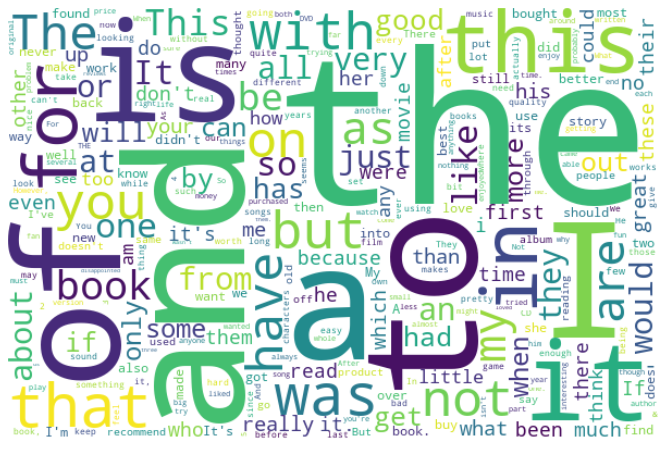

In [50]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Before Cleaning the data

#Generate word frequencies
word_freq = Generate_frequency(amazon_reviews_df.Reviews.str)

#Generate word cloud
wc = WordCloud(width=600, height=400, max_words=300, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Frequency after cleaning the data

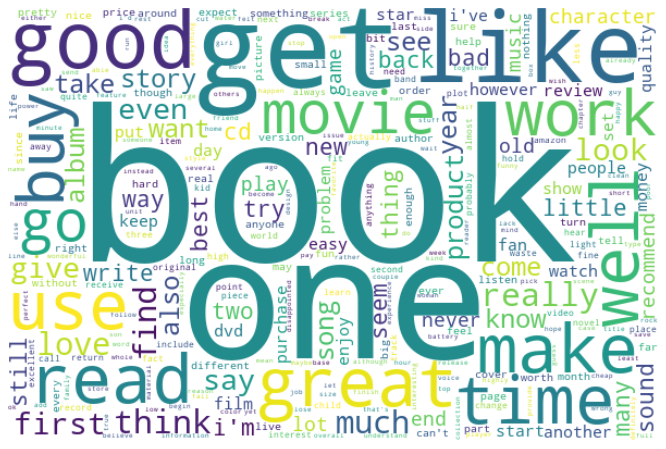

In [49]:
#After Cleaning the Data

#Generate word frequencies
word_freq = Generate_frequency(amazon_reviews_df.Clean_Reviews.str)

#Generate word cloud
wc = WordCloud(width=600, height=400, max_words=300, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Initialise sentiment analyser
Sentiment_Analyser = SentimentIntensityAnalyzer()
amazon_reviews_df["Clean_Reviews"].apply(lambda x: Sentiment_Analyser.polarity_scores(x))


2945667    {'neg': 0.236, 'neu': 0.669, 'pos': 0.094, 'co...
2352586    {'neg': 0.219, 'neu': 0.466, 'pos': 0.315, 'co...
1531260    {'neg': 0.188, 'neu': 0.563, 'pos': 0.248, 'co...
941910     {'neg': 0.167, 'neu': 0.714, 'pos': 0.119, 'co...
2582125    {'neg': 0.04, 'neu': 0.876, 'pos': 0.084, 'com...
                                 ...                        
2278236    {'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp...
2917178    {'neg': 0.287, 'neu': 0.441, 'pos': 0.272, 'co...
2853224    {'neg': 0.111, 'neu': 0.575, 'pos': 0.314, 'co...
505979     {'neg': 0.276, 'neu': 0.635, 'pos': 0.088, 'co...
321276     {'neg': 0.139, 'neu': 0.645, 'pos': 0.217, 'co...
Name: Clean_Reviews, Length: 300000, dtype: object

In [117]:

negative_score = []
neutral_score = []
positive_score = []
compound_score = []

for review in amazon_reviews_df.Clean_Reviews:
    result = Sentiment_Analyser.polarity_scores(review)
    negative_score.append(result['neg'])
    neutral_score.append(result['neu'])
    positive_score.append(result['pos'])
    compound_score.append(result['compound'])

In [119]:
amazon_reviews_df["neg"] = negative_score
amazon_reviews_df["neu"] = neutral_score
amazon_reviews_df["pos"] = positive_score
amazon_reviews_df["compound"] = compound_score

In [56]:
amazon_reviews_df

,Rating,Title,Reviews,Polarity_of_review,Clean_Reviews,negative_score,neutral_score,positive_score,compound_score
2945667,4,Not Koontz's best but good read.,"Really, I should give it three and a half star...",1,really give three half star i'm force round wa...,0.139,0.645,0.217,0.7212
2352586,4,addictive--except for the price,mmmmmmm. Love this balm. Smells divine and mak...,1,mmmmmmm love balm smell divine make skin velve...,0.139,0.645,0.217,0.7212
1531260,2,Same problem,"Pitch Black plays perfectly, but for some reas...",0,pitch black play perfectly reason chronicle st...,0.139,0.645,0.217,0.7212
941910,1,Just say no to Slim-fast low carb shakes,I am currently on a Slim-fast diet and found i...,0,currently slim-fast diet find well expect tame...,0.139,0.645,0.217,0.7212
2582125,5,Happy Thanksgiving Turkey,I'm not much on writing reviews so I will be b...,1,i'm much write reviews brief rack best market ...,0.139,0.645,0.217,0.7212
...,...,...,...,...,...,...,...,...,...
2278236,5,A social analysis of the computer's effects on...,How do computers affect such diverse social is...,1,computer affect diverse social issue cultural ...,0.139,0.645,0.217,0.7212
2917178,5,SkyDyes by Mickey Lawler,An excellent resource written by one of the ex...,1,excellent resource write one expert field fabr...,0.139,0.645,0.217,0.7212
2853224,2,not worth $50,Pillow is fair. Not a real solution for my nec...,0,pillow fair real solution neck/back stress/str...,0.139,0.645,0.217,0.7212
505979,1,The Most Boring Book in the World!!!!!!!!!,The Invisible Man is the first book that I rea...,0,invisible man first book read every word bore ...,0.139,0.645,0.217,0.7212


In [57]:
# add number of characters column
amazon_reviews_df["nb_chars"] = amazon_reviews_df["Clean_Reviews"].apply(lambda x: len(x))

# add number of words column
amazon_reviews_df["nb_words"] = amazon_reviews_df["Clean_Reviews"].apply(lambda x: len(x.split(" ")))

In [60]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(amazon_reviews_df["Clean_Reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = amazon_reviews_df["Clean_Reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
amazon_reviews_df = pd.concat([amazon_reviews_df, doc2vec_df], axis=1)

In [65]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10, max_features = 1000)
tfidf_result = tfidf.fit_transform(amazon_reviews_df["Clean_Reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = amazon_reviews_df.index
amazon_reviews_df = pd.concat([amazon_reviews_df, tfidf_df], axis=1)

In [66]:
amazon_reviews_df["Polarity_of_review"].value_counts(normalize = True)

1    0.599197
0    0.400803
Name: Polarity_of_review, dtype: float64

In [71]:
amazon_reviews_df.head()

,Rating,Title,Reviews,Polarity_of_review,Clean_Reviews,negative_score,neutral_score,positive_score,compound_score,nb_chars,...,word_world,word_worth,word_write,word_writer,word_wrong,word_year,word_yes,word_yet,word_you,word_young
2945667,4,Not Koontz's best but good read.,"Really, I should give it three and a half star...",1,really give three half star i'm force round wa...,0.139,0.645,0.217,0.7212,132,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352586,4,addictive--except for the price,mmmmmmm. Love this balm. Smells divine and mak...,1,mmmmmmm love balm smell divine make skin velve...,0.139,0.645,0.217,0.7212,176,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531260,2,Same problem,"Pitch Black plays perfectly, but for some reas...",0,pitch black play perfectly reason chronicle st...,0.139,0.645,0.217,0.7212,265,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941910,1,Just say no to Slim-fast low carb shakes,I am currently on a Slim-fast diet and found i...,0,currently slim-fast diet find well expect tame...,0.139,0.645,0.217,0.7212,326,...,0.0,0.124407,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582125,5,Happy Thanksgiving Turkey,I'm not much on writing reviews so I will be b...,1,i'm much write reviews brief rack best market ...,0.139,0.645,0.217,0.7212,259,...,0.0,0.000000,0.164037,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
amazon_reviews_df2 = amazon_reviews_df.iloc[:, 0:11]

In [76]:
amazon_reviews_df2

,Rating,Title,Reviews,Polarity_of_review,Clean_Reviews,negative_score,neutral_score,positive_score,compound_score,nb_chars,nb_words
2945667,4,Not Koontz's best but good read.,"Really, I should give it three and a half star...",1,really give three half star i'm force round wa...,0.139,0.645,0.217,0.7212,132,21
2352586,4,addictive--except for the price,mmmmmmm. Love this balm. Smells divine and mak...,1,mmmmmmm love balm smell divine make skin velve...,0.139,0.645,0.217,0.7212,176,23
1531260,2,Same problem,"Pitch Black plays perfectly, but for some reas...",0,pitch black play perfectly reason chronicle st...,0.139,0.645,0.217,0.7212,265,42
941910,1,Just say no to Slim-fast low carb shakes,I am currently on a Slim-fast diet and found i...,0,currently slim-fast diet find well expect tame...,0.139,0.645,0.217,0.7212,326,49
2582125,5,Happy Thanksgiving Turkey,I'm not much on writing reviews so I will be b...,1,i'm much write reviews brief rack best market ...,0.139,0.645,0.217,0.7212,259,46
...,...,...,...,...,...,...,...,...,...,...,...
2278236,5,A social analysis of the computer's effects on...,How do computers affect such diverse social is...,1,computer affect diverse social issue cultural ...,0.139,0.645,0.217,0.7212,289,36
2917178,5,SkyDyes by Mickey Lawler,An excellent resource written by one of the ex...,1,excellent resource write one expert field fabr...,0.139,0.645,0.217,0.7212,52,8
2853224,2,not worth $50,Pillow is fair. Not a real solution for my nec...,0,pillow fair real solution neck/back stress/str...,0.139,0.645,0.217,0.7212,115,17
505979,1,The Most Boring Book in the World!!!!!!!!!,The Invisible Man is the first book that I rea...,0,invisible man first book read every word bore ...,0.139,0.645,0.217,0.7212,186,28


In [120]:
amazon_reviews_df2["neg"] = negative_score
amazon_reviews_df2["neu"] = neutral_score
amazon_reviews_df2["pos"] = positive_score
amazon_reviews_df2["compound"] = compound_score

In [122]:
amazon_reviews_df2[amazon_reviews_df2["nb_words"] >= 20].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(10)


,Reviews,pos
1253990,GREAT GREAT GREAT GREATGREAT GREAT GREAT GREAT...,0.937
954489,I am a huge fan of stand up comedy and this DV...,0.816
2805607,"This is not an academy-award winner, but it wa...",0.786
581919,I loved this book. It was written with such wi...,0.784
970407,A very good romance movie.I think anyone who l...,0.780
836561,I can't say enough about this project. The son...,0.771
2639077,This was a pleasant surprise. The workouts are...,0.770
838473,These jeans fit better than most Levi's. The c...,0.757
912649,"A pretty book, full of gorgeous paintings of c...",0.754
606651,"Great, great, great! Cynthia McKinney is intel...",0.747


In [127]:
amazon_reviews_df2[amazon_reviews_df2["nb_words"] >= 20].sort_values("neg", ascending = True)[["Reviews", "neg"]].head(10)

,Reviews,neg
1684615,"these jeans last forever, they fade nicely and...",0.0
1411989,McCartney shines in a cherry picked four piece...,0.0
2659132,It was fun to watch this old police show. Ther...,0.0
2834577,It is a funny thing about these reviews. Most ...,0.0
2388931,This was an entertaining and fun book. Recomen...,0.0
43884,I had this book from our local library. Starte...,0.0
2663343,Important things I like about the product.1. V...,0.0
2187660,If you want to understand the Bible all you ne...,0.0
2165803,"I have to admit after enjoying ""American Life""...",0.0
1342390,This is a good beginner book with simple patte...,0.0


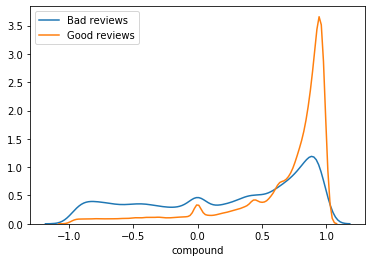

In [129]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = amazon_reviews_df2[amazon_reviews_df2['Polarity_of_review'] == x]
    
    # Draw the density plot
    if x == 1:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [136]:
del amazon_reviews_df['negative_score']

In [138]:
del amazon_reviews_df['neutral_score']
del amazon_reviews_df ['positive_score']                    
del amazon_reviews_df['compound_score']

In [139]:
amazon_reviews_df

,Rating,Title,Reviews,Polarity_of_review,Clean_Reviews,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,...,word_wrong,word_year,word_yes,word_yet,word_you,word_young,neg,neu,pos,compound
2945667,4,Not Koontz's best but good read.,"Really, I should give it three and a half star...",1,really give three half star i'm force round wa...,132,21,-0.111680,-0.087181,0.099372,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.236,0.669,0.094,-0.3818
2352586,4,addictive--except for the price,mmmmmmm. Love this balm. Smells divine and mak...,1,mmmmmmm love balm smell divine make skin velve...,176,23,0.128267,0.017211,0.157265,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.219,0.466,0.315,0.6711
1531260,2,Same problem,"Pitch Black plays perfectly, but for some reas...",0,pitch black play perfectly reason chronicle st...,265,42,0.014913,0.183766,0.056721,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.188,0.563,0.248,0.3400
941910,1,Just say no to Slim-fast low carb shakes,I am currently on a Slim-fast diet and found i...,0,currently slim-fast diet find well expect tame...,326,49,0.399553,-0.040266,0.075536,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.167,0.714,0.119,-0.1882
2582125,5,Happy Thanksgiving Turkey,I'm not much on writing reviews so I will be b...,1,i'm much write reviews brief rack best market ...,259,46,0.229469,-0.159465,0.117518,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.040,0.876,0.084,0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278236,5,A social analysis of the computer's effects on...,How do computers affect such diverse social is...,1,computer affect diverse social issue cultural ...,289,36,-0.088804,-0.059473,-0.114428,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.072,0.928,0.000,-0.4019
2917178,5,SkyDyes by Mickey Lawler,An excellent resource written by one of the ex...,1,excellent resource write one expert field fabr...,52,8,-0.029895,-0.029449,-0.051060,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.287,0.441,0.272,-0.0516
2853224,2,not worth $50,Pillow is fair. Not a real solution for my nec...,0,pillow fair real solution neck/back stress/str...,115,17,0.182844,0.049561,0.024946,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.111,0.575,0.314,0.5574
505979,1,The Most Boring Book in the World!!!!!!!!!,The Invisible Man is the first book that I rea...,0,invisible man first book read every word bore ...,186,28,-0.115474,-0.024813,0.310157,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.276,0.635,0.088,-0.7003


In [141]:
# feature selection
label = "Polarity_of_review"
ignore_cols = [label ,'Title', "Reviews", "Clean_Reviews", 'Rating']
features = [c for c in amazon_reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(amazon_reviews_df[features], amazon_reviews_df[label], test_size = 0.20, random_state = 42)


In [142]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
1010,compound,0.052784
1009,pos,0.047431
1007,neg,0.032622
3,doc2vec_vector_1,0.016987
1008,neu,0.015547
5,doc2vec_vector_3,0.013421
965,word_waste,0.011952
4,doc2vec_vector_2,0.011651
6,doc2vec_vector_4,0.011508
0,nb_chars,0.011376


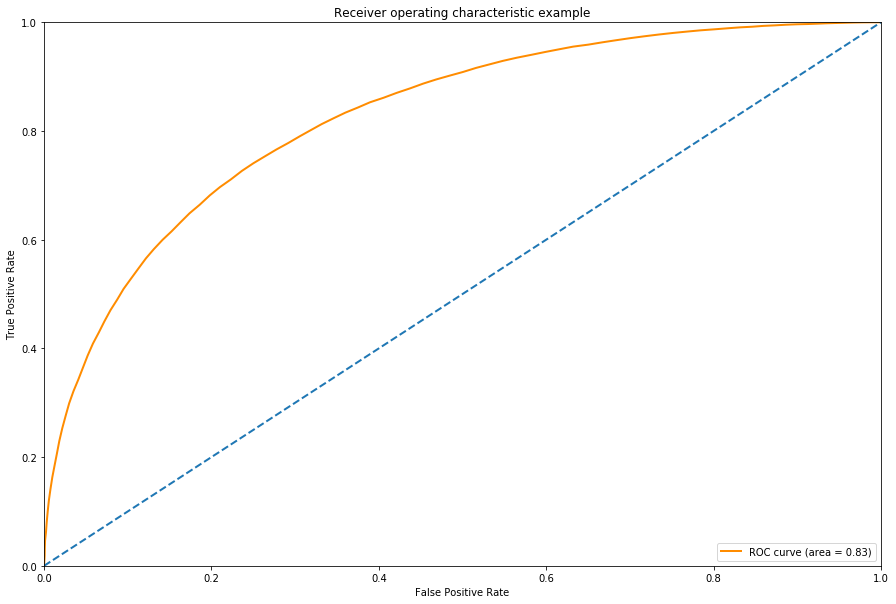

In [143]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()